# Water Poatability Test 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings("ignore")

### Data Importing

In [2]:
# Read the data in
data = pd.read_csv("water_potability.csv")

In [3]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


### Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### Checking Missing Values

In [5]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
for column in ['ph','Sulfate','Trihalomethanes']:
    data[column].fillna(data[column].median(), inplace=True)

In [7]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Checking and Treatnent of Outliers

<Axes: >

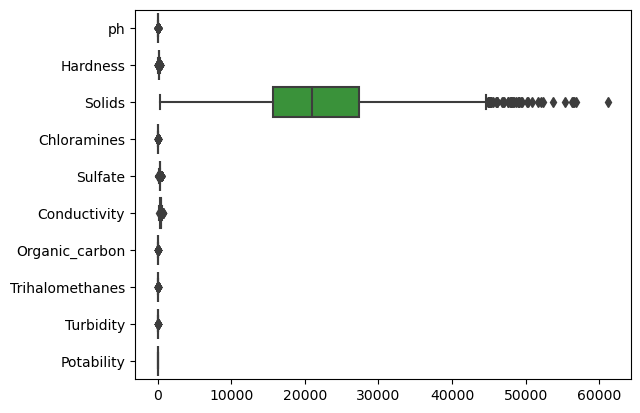

In [8]:
sns.boxplot(data=data, orient="h")

In [9]:
# Treating outliers using Winsorizing Techniques
for i in data:
    if data[i].dtypes in ("float64","int64"):
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        data[i].clip(upper=ul,lower=ll,inplace=True)

<Axes: >

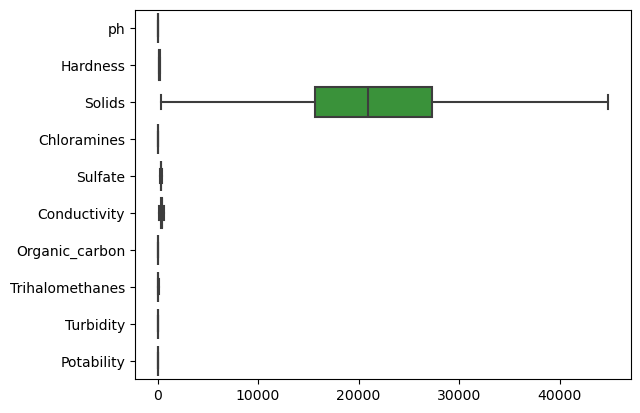

In [10]:
sns.boxplot(data=data, orient='h')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### Dividing Data into Train and Test

In [12]:
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = data.drop(['Potability'],axis=1)
y = data[['Potability']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=459)

### Model Building


In [13]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

In [14]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,Potability,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3081,0,10.258615,141.488391,23989.990151,7.962066,389.392897,361.632055,14.908725,57.164556,3.590841
3072,0,7.036752,205.233634,21829.273148,6.677057,331.674650,338.567758,15.566655,56.608679,2.545631
1017,0,8.551078,216.415932,28909.290284,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380
295,1,6.139494,236.674026,8081.466471,6.250808,333.073546,416.238821,12.777014,106.037222,3.260907
2400,1,3.889107,117.125160,14904.940387,7.729645,400.322434,382.224370,15.872221,66.622485,4.473976


In [15]:
independent_variable = list(train.columns[1:])
independent_variable

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

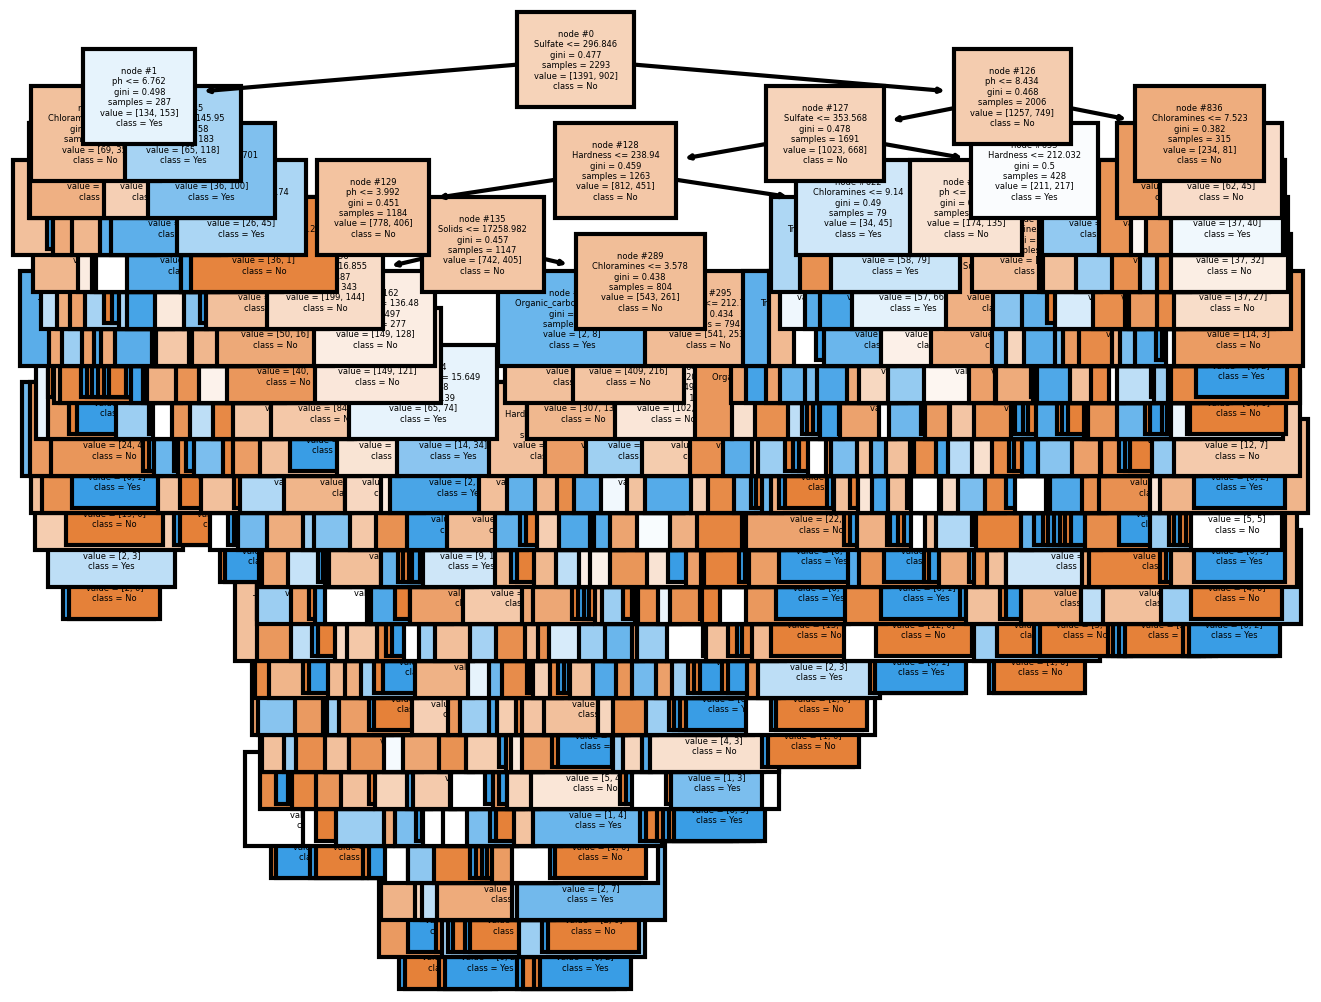

In [16]:
from sklearn import tree
import matplotlib.pyplot as plt

Potability=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Potability, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

In [17]:
train.head()

,Potability,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3081,0,10.258615,141.488391,23989.990151,7.962066,389.392897,361.632055,14.908725,57.164556,3.590841
3072,0,7.036752,205.233634,21829.273148,6.677057,331.674650,338.567758,15.566655,56.608679,2.545631
1017,0,8.551078,216.415932,28909.290284,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380
295,1,6.139494,236.674026,8081.466471,6.250808,333.073546,416.238821,12.777014,106.037222,3.260907
2400,1,3.889107,117.125160,14904.940387,7.729645,400.322434,382.224370,15.872221,66.622485,4.473976


In [18]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,Potability,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Predicted
3081,0,10.258615,141.488391,23989.990151,7.962066,389.392897,361.632055,14.908725,57.164556,3.590841,0
3072,0,7.036752,205.233634,21829.273148,6.677057,331.674650,338.567758,15.566655,56.608679,2.545631,0
1017,0,8.551078,216.415932,28909.290284,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380,0
295,1,6.139494,236.674026,8081.466471,6.250808,333.073546,416.238821,12.777014,106.037222,3.260907,1
2400,1,3.889107,117.125160,14904.940387,7.729645,400.322434,382.224370,15.872221,66.622485,4.473976,1


In [19]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Potability'])
print(matrix)

[[1391    0]
 [   0  902]]


In [20]:
Accuracy_Train=((1391+902)/(2293)*100)
print(Accuracy_Train)   # overfit or High accuracy

100.0


In [21]:
from sklearn.metrics import classification_report
print(classification_report(train['Potability'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1391
           1       1.00      1.00      1.00       902

    accuracy                           1.00      2293
   macro avg       1.00      1.00      1.00      2293
weighted avg       1.00      1.00      1.00      2293



In [22]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=55, ## child
                                 min_samples_split=20, #parent 
                                 max_depth=6)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=55, min_samples_split=20)

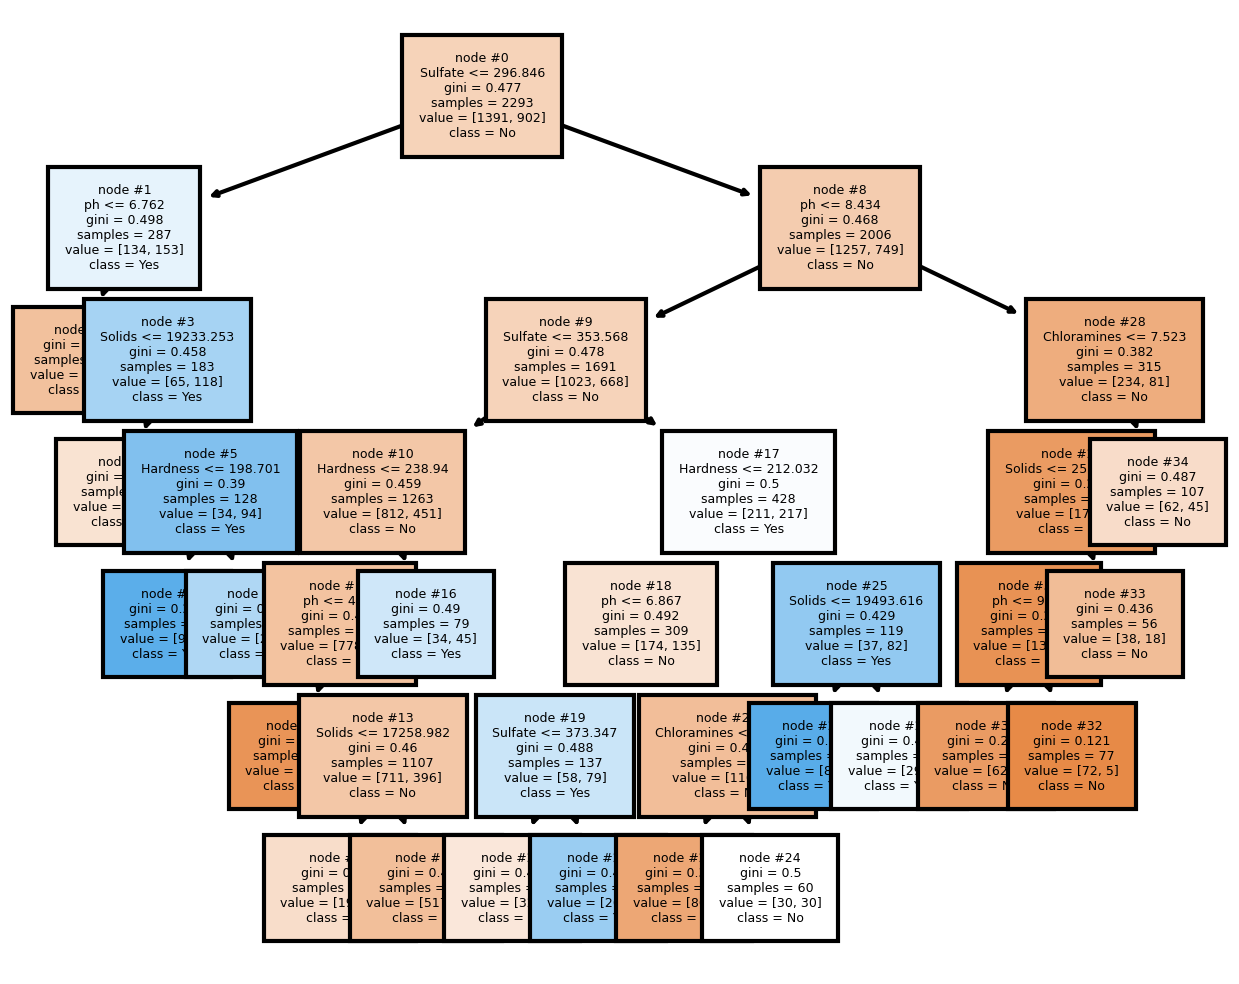

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt

Potability=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Potability, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=3); # 
#fig.savefig('imagename.png')

In [24]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,Potability,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Predicted
3081,0,10.258615,141.488391,23989.990151,7.962066,389.392897,361.632055,14.908725,57.164556,3.590841,0
3072,0,7.036752,205.233634,21829.273148,6.677057,331.674650,338.567758,15.566655,56.608679,2.545631,0
1017,0,8.551078,216.415932,28909.290284,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380,1
295,1,6.139494,236.674026,8081.466471,6.250808,333.073546,416.238821,12.777014,106.037222,3.260907,0
2400,1,3.889107,117.125160,14904.940387,7.729645,400.322434,382.224370,15.872221,66.622485,4.473976,1


In [25]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Potability'])
print(matrix)

[[1260  628]
 [ 131  274]]


In [26]:
Accuracy_Train=((1260+274)/(2293)*100)
print(Accuracy_Train)

66.89925861317052


In [27]:
from sklearn.metrics import classification_report
print(classification_report(train['Potability'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77      1391
           1       0.68      0.30      0.42       902

    accuracy                           0.67      2293
   macro avg       0.67      0.60      0.59      2293
weighted avg       0.67      0.67      0.63      2293



In [28]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2710,5.654119,171.751551,16431.204897,7.283454,387.904632,419.097306,11.814852,86.308236,3.466264,1
1801,7.323545,184.136070,21044.202663,6.842947,327.261202,379.492453,8.335245,90.312062,4.898421,0
1218,6.280978,205.123123,25972.803751,8.417896,383.671459,456.543945,13.954710,32.799029,4.599432,1
155,6.906992,216.785291,19991.239149,7.302352,340.106028,356.459137,9.614106,61.122644,2.124759,0
434,6.143921,175.274076,29072.169654,11.096086,287.698157,469.983324,13.142493,83.279658,3.476213,0


In [29]:
test['Predicted']=dt.predict(X_test)
test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Predicted
2710,5.654119,171.751551,16431.204897,7.283454,387.904632,419.097306,11.814852,86.308236,3.466264,1,1
1801,7.323545,184.136070,21044.202663,6.842947,327.261202,379.492453,8.335245,90.312062,4.898421,0,0
1218,6.280978,205.123123,25972.803751,8.417896,383.671459,456.543945,13.954710,32.799029,4.599432,1,1
155,6.906992,216.785291,19991.239149,7.302352,340.106028,356.459137,9.614106,61.122644,2.124759,0,0
434,6.143921,175.274076,29072.169654,11.096086,287.698157,469.983324,13.142493,83.279658,3.476213,0,0


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Potability'])
print(confusion_matrix)

[[536 270]
 [ 71 106]]


In [31]:
Accuracy_test=((536+106)/(983)*100)
Accuracy_test

65.31027466937945

In [32]:
from sklearn.metrics import classification_report
print(classification_report(train['Potability'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77      1391
           1       0.68      0.30      0.42       902

    accuracy                           0.67      2293
   macro avg       0.67      0.60      0.59      2293
weighted avg       0.67      0.67      0.63      2293



In [33]:
from sklearn.metrics import classification_report
print(classification_report(test['Potability'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76       607
           1       0.60      0.28      0.38       376

    accuracy                           0.65       983
   macro avg       0.63      0.58      0.57       983
weighted avg       0.64      0.65      0.62       983



### Tuning By Grid Search

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [5, 4,6], ## Parent 
           'min_samples_leaf': [5,4,6], ## Child or Leave 
           'max_depth':[3,4,6]}  # Branches
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 6], 'min_samples_leaf': [5, 4, 6],
                         'min_samples_split': [5, 4, 6]},
             verbose=1)

In [35]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [36]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=5, ## child
                                 min_samples_split=5, #parent 
                                 max_depth=6)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=5)

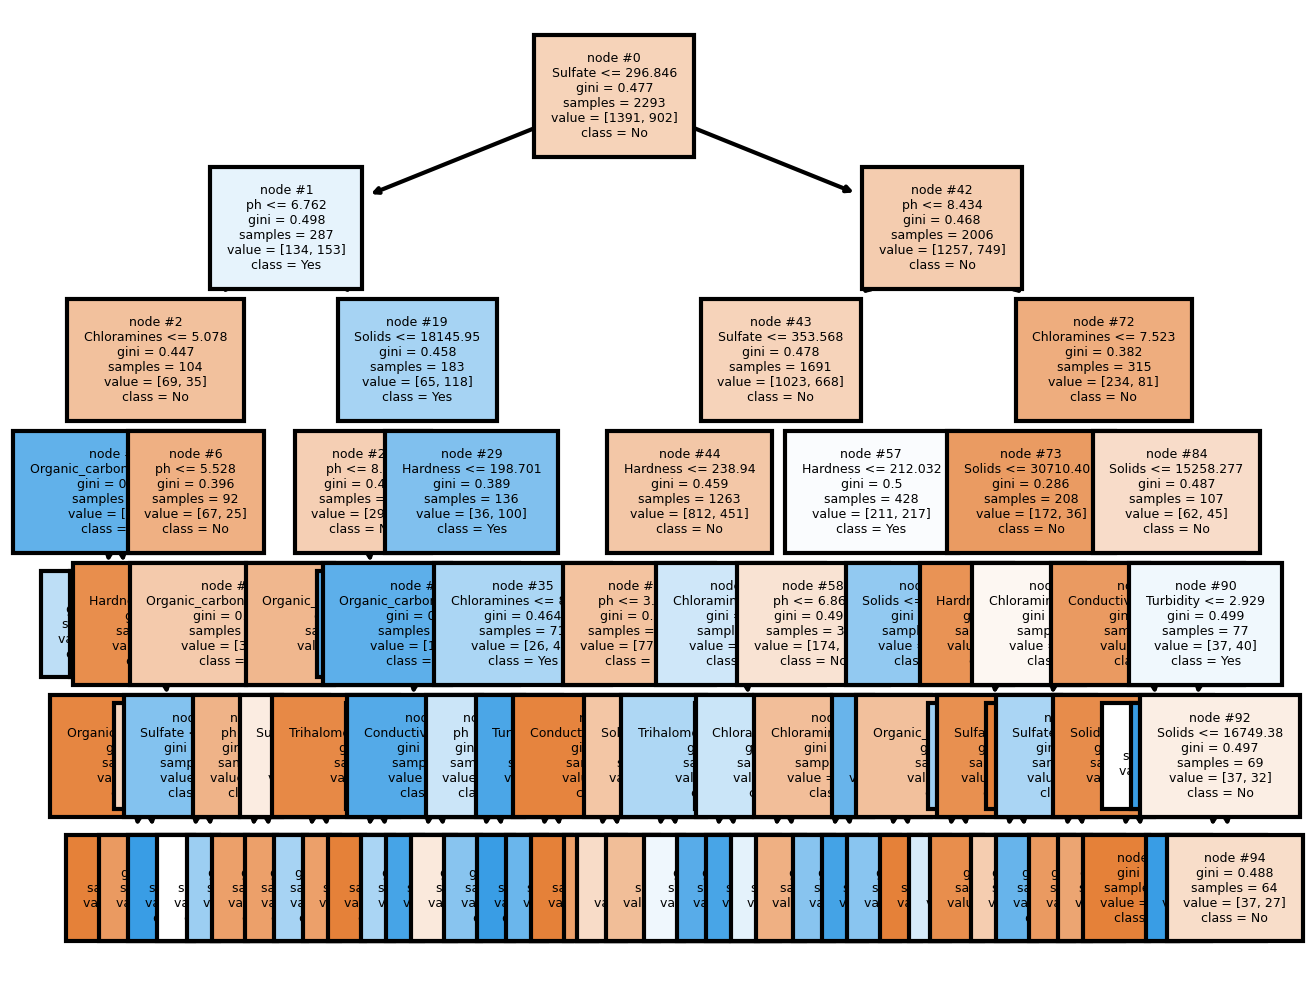

In [37]:
from sklearn import tree
import matplotlib.pyplot as plt

Potability=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Potability, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=3); # 
#fig.savefig('imagename.png')

In [38]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,Potability,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Predicted
3081,0,10.258615,141.488391,23989.990151,7.962066,389.392897,361.632055,14.908725,57.164556,3.590841,0
3072,0,7.036752,205.233634,21829.273148,6.677057,331.674650,338.567758,15.566655,56.608679,2.545631,0
1017,0,8.551078,216.415932,28909.290284,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380,1
295,1,6.139494,236.674026,8081.466471,6.250808,333.073546,416.238821,12.777014,106.037222,3.260907,0
2400,1,3.889107,117.125160,14904.940387,7.729645,400.322434,382.224370,15.872221,66.622485,4.473976,1


In [39]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Potability'])
print(matrix)

[[1244  533]
 [ 147  369]]


In [40]:
Accuracy_Train=((1244+369)/(2293)*100)
print(Accuracy_Train)

70.34452682075883


### Model Building Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=20, # make 20 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=20)

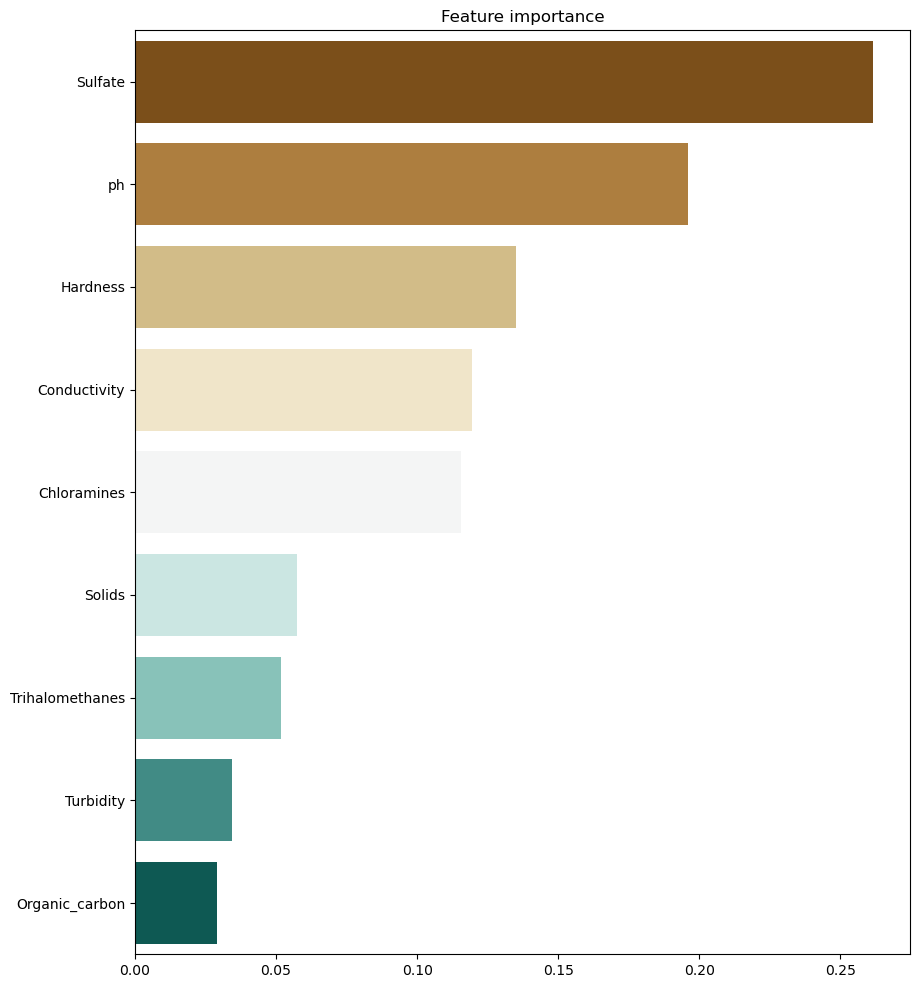

In [42]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')

### Visualization

In [43]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [44]:
list(x.columns)

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

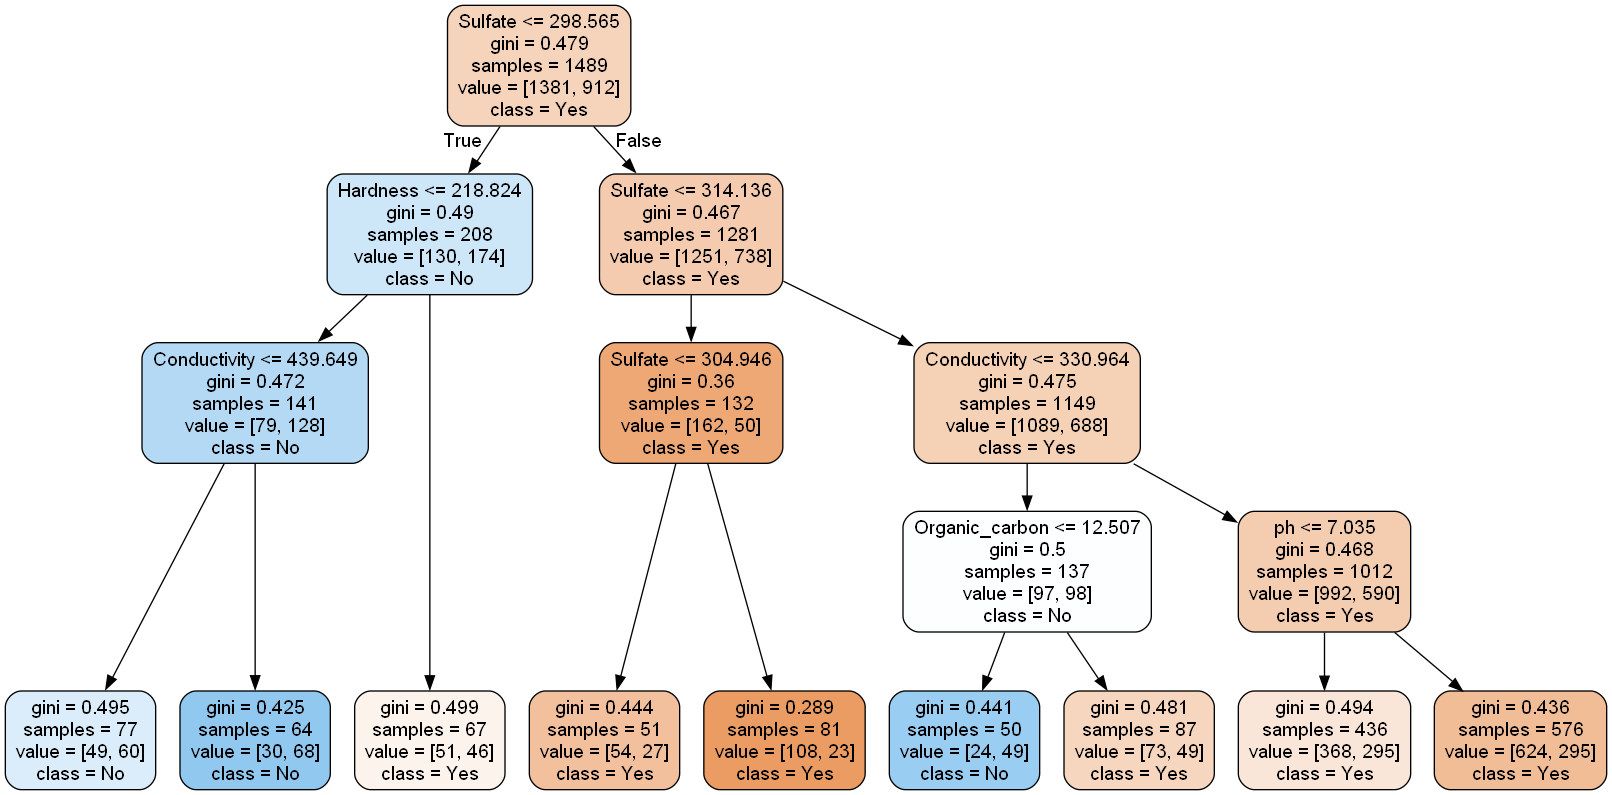

In [45]:
tree = Model.estimators_[5]  # specify the tree number   
Churn=['Yes','No'] 
feature_list = list(x.columns)  # all independent variable name

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=Churn,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

In [46]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3081,10.258615,141.488391,23989.990151,7.962066,389.392897,361.632055,14.908725,57.164556,3.590841,0
3072,7.036752,205.233634,21829.273148,6.677057,331.674650,338.567758,15.566655,56.608679,2.545631,0
1017,8.551078,216.415932,28909.290284,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380,0
295,6.139494,236.674026,8081.466471,6.250808,333.073546,416.238821,12.777014,106.037222,3.260907,1
2400,3.889107,117.125160,14904.940387,7.729645,400.322434,382.224370,15.872221,66.622485,4.473976,1


In [47]:
train['Predicted']=Model.predict(X_train)
train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Predicted
3081,10.258615,141.488391,23989.990151,7.962066,389.392897,361.632055,14.908725,57.164556,3.590841,0,0
3072,7.036752,205.233634,21829.273148,6.677057,331.674650,338.567758,15.566655,56.608679,2.545631,0,0
1017,8.551078,216.415932,28909.290284,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380,0,0
295,6.139494,236.674026,8081.466471,6.250808,333.073546,416.238821,12.777014,106.037222,3.260907,1,0
2400,3.889107,117.125160,14904.940387,7.729645,400.322434,382.224370,15.872221,66.622485,4.473976,1,0


In [48]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Potability'])
print(matrix)

[[1360  802]
 [  31  100]]


In [49]:
Accuracy_train=((1364+105)/(2293)*100)
Accuracy_train

64.06454426515482

In [50]:
from sklearn.metrics import classification_report
print(classification_report(test['Potability'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76       607
           1       0.60      0.28      0.38       376

    accuracy                           0.65       983
   macro avg       0.63      0.58      0.57       983
weighted avg       0.64      0.65      0.62       983



In [51]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2710,5.654119,171.751551,16431.204897,7.283454,387.904632,419.097306,11.814852,86.308236,3.466264,1
1801,7.323545,184.136070,21044.202663,6.842947,327.261202,379.492453,8.335245,90.312062,4.898421,0
1218,6.280978,205.123123,25972.803751,8.417896,383.671459,456.543945,13.954710,32.799029,4.599432,1
155,6.906992,216.785291,19991.239149,7.302352,340.106028,356.459137,9.614106,61.122644,2.124759,0
434,6.143921,175.274076,29072.169654,11.096086,287.698157,469.983324,13.142493,83.279658,3.476213,0


In [52]:
test['Predicted']=Model.predict(X_test)
test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Predicted
2710,5.654119,171.751551,16431.204897,7.283454,387.904632,419.097306,11.814852,86.308236,3.466264,1,0
1801,7.323545,184.136070,21044.202663,6.842947,327.261202,379.492453,8.335245,90.312062,4.898421,0,0
1218,6.280978,205.123123,25972.803751,8.417896,383.671459,456.543945,13.954710,32.799029,4.599432,1,0
155,6.906992,216.785291,19991.239149,7.302352,340.106028,356.459137,9.614106,61.122644,2.124759,0,0
434,6.143921,175.274076,29072.169654,11.096086,287.698157,469.983324,13.142493,83.279658,3.476213,0,0


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Potability'])
print(confusion_matrix)

[[586 338]
 [ 21  38]]


In [54]:
Accuracy_test=((587+46)/(983)*100)
Accuracy_test

64.39471007121058

In [55]:

from sklearn.metrics import classification_report
print(classification_report(test['Potability'], test['Predicted']))


              precision    recall  f1-score   support

           0       0.63      0.97      0.77       607
           1       0.64      0.10      0.17       376

    accuracy                           0.63       983
   macro avg       0.64      0.53      0.47       983
weighted avg       0.64      0.63      0.54       983



### Tuning By Grid Search

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 4, 5],
    'min_samples_split': [5, 6,7],
    'min_samples_leaf': [5, 6,7]
}

In [57]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=14, # make 14 tress
                               criterion="gini",
                               max_depth=6,  # each tree will have 6 branches
                               min_samples_split=5,# each tree will have parent node
                               min_samples_leaf=4,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=14)

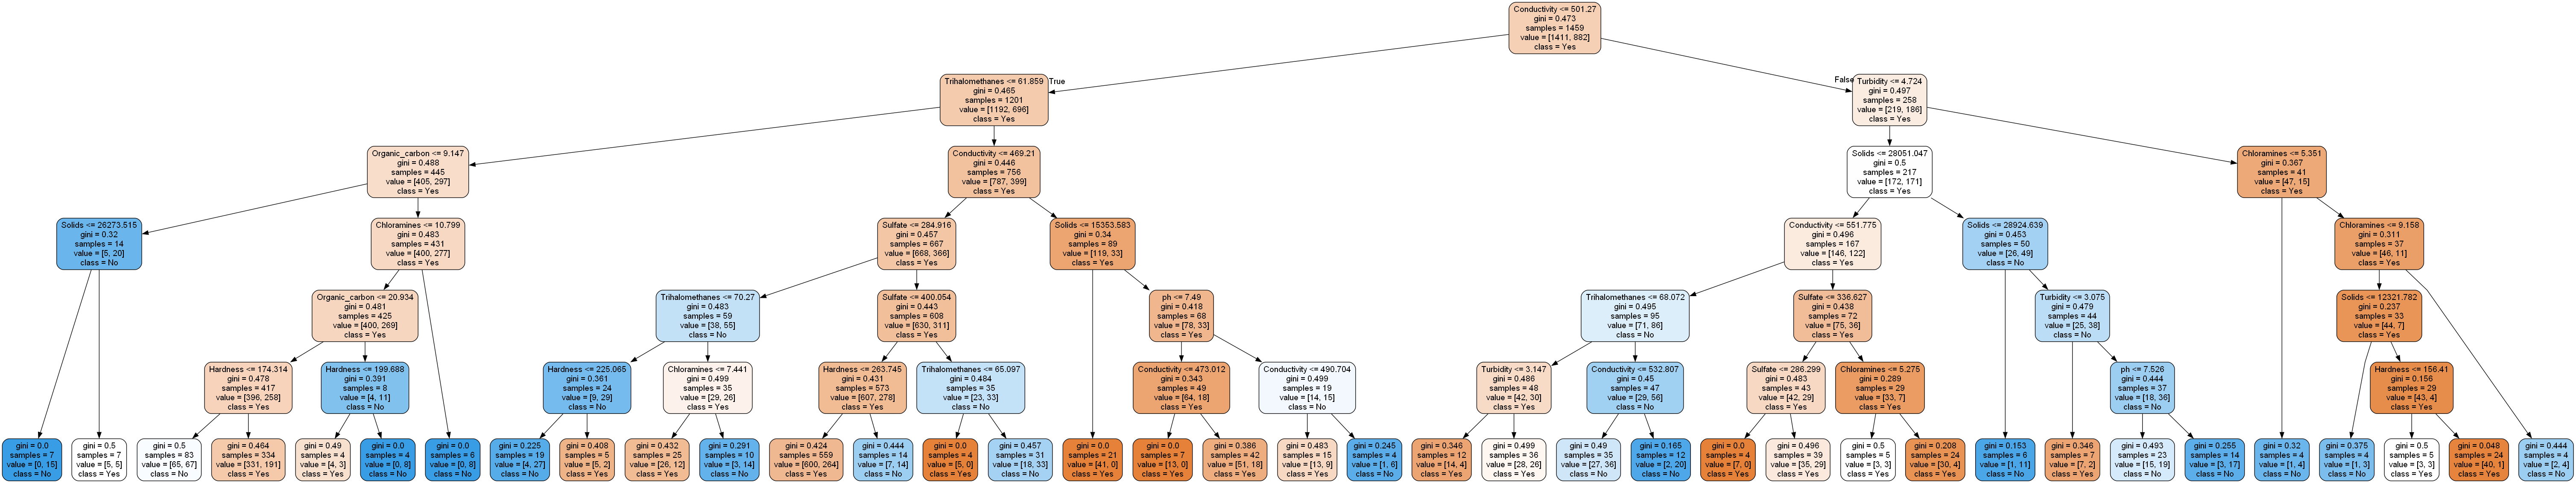

In [59]:
tree = Model.estimators_[5]  # specify the tree number   
Churn=['Yes','No'] 
feature_list = list(x.columns)  # all independent variable name

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=Churn,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

In [60]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3081,10.258615,141.488391,23989.990151,7.962066,389.392897,361.632055,14.908725,57.164556,3.590841,0
3072,7.036752,205.233634,21829.273148,6.677057,331.674650,338.567758,15.566655,56.608679,2.545631,0
1017,8.551078,216.415932,28909.290284,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380,0
295,6.139494,236.674026,8081.466471,6.250808,333.073546,416.238821,12.777014,106.037222,3.260907,1
2400,3.889107,117.125160,14904.940387,7.729645,400.322434,382.224370,15.872221,66.622485,4.473976,1


In [61]:
train['Predicted']=Model.predict(X_train)
train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Predicted
3081,10.258615,141.488391,23989.990151,7.962066,389.392897,361.632055,14.908725,57.164556,3.590841,0,0
3072,7.036752,205.233634,21829.273148,6.677057,331.674650,338.567758,15.566655,56.608679,2.545631,0,0
1017,8.551078,216.415932,28909.290284,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380,0,0
295,6.139494,236.674026,8081.466471,6.250808,333.073546,416.238821,12.777014,106.037222,3.260907,1,0
2400,3.889107,117.125160,14904.940387,7.729645,400.322434,382.224370,15.872221,66.622485,4.473976,1,0


In [62]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Potability'])
print(matrix)

[[1366  651]
 [  25  251]]


In [63]:
Accuracy_train=((1359+260)/(2293)*100)
Accuracy_train

70.60619276057567

In [64]:
from sklearn.metrics import classification_report
print(classification_report(test['Potability'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.63      0.97      0.77       607
           1       0.64      0.10      0.17       376

    accuracy                           0.63       983
   macro avg       0.64      0.53      0.47       983
weighted avg       0.64      0.63      0.54       983



### Model Building

In [65]:
# Gradient Boosting
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [66]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [2,4,5], # number of tress
                    'max_depth':    [2, 3,4,5],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'min_samples_leaf':[4,5,6,7], ## child
                    'min_samples_split':[4,5,6,7]} #parent 

In [67]:
# Gridsearch the parameters to find the best parameters.
model = GradientBoostingClassifier(random_state=10,loss="deviance",criterion="squared_error")
## random_state  -- The random number seed so that same random numbers are generated every time.

gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters,  # comibnation = 4
                    cv=5,  # K-fold = 10 or 5  
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(x, y)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(criterion='squared_error',
                                                  loss='deviance',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [4, 5, 6, 7],
                         'min_samples_split': [4, 5, 6, 7],
                         'n_estimators': [2, 4, 5]},
             scoring='accuracy', verbose=1)

In [68]:
print('The best parameter are -', gscv_GBM.best_params_)

The best parameter are - {'learning_rate': 0.6, 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 2}


In [69]:
# Re-fit the model with the best parameters
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.6, max_depth=5, min_samples_leaf=6,
                           min_samples_split=4, n_estimators=2)

In [70]:
# Prediction
train_pred = final_mod_GBM.predict(X_train)
test_pred = final_mod_GBM.predict(X_test)

In [71]:
train_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [72]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.71      0.89      0.79      1391
           1       0.73      0.44      0.55       902

    accuracy                           0.72      2293
   macro avg       0.72      0.67      0.67      2293
weighted avg       0.72      0.72      0.70      2293



In [73]:
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.68      0.83      0.74       607
           1       0.56      0.36      0.44       376

    accuracy                           0.65       983
   macro avg       0.62      0.59      0.59       983
weighted avg       0.63      0.65      0.63       983



### Gradient Boosting Tree

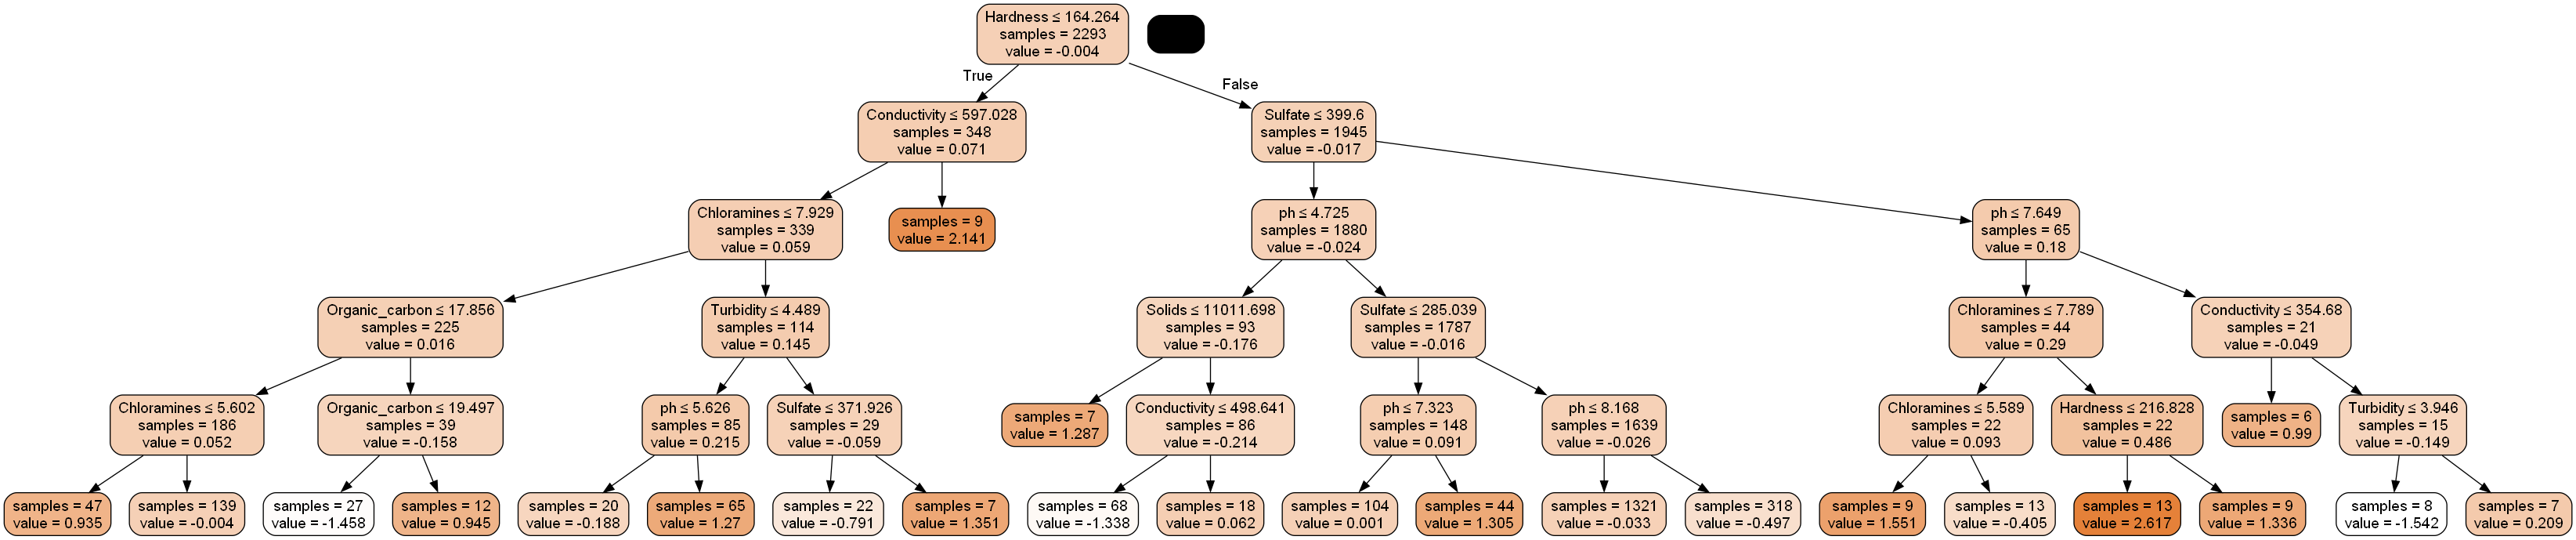

In [74]:
from sklearn.tree import export_graphviz
sub_tree = final_mod_GBM.estimators_[1, 0] #0 to 99  # Model ( Final_mod_GBM) = Give Tree
churn=['Yes','No']
feature_list = list(x.columns)

# Visualization. Install graphviz in your system
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(sub_tree,
    out_file=None,
    class_names=churn,
    feature_names = feature_list, 
    filled=True, 
    rounded=True,
    special_characters=True,
    impurity=False)

graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

In [75]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier # Extrame GB
from xgboost import plot_importance ## Plotting Importance Variables 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [76]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [10, 50, 60], # number of tress
                    'max_depth':    [3, 5,4],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'reg_lambda':[0,1]} #parent 

In [77]:
# Gridsearch the parameters to find the best parameters. Using L2 penalty
model = XGBClassifier()   # Lamda = 0 
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(X_train, y_train)  ## Model building


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [3, 5, 4],
                         'n_estimators': [10, 50, 60], 'reg_lambda': [0, 1]},
             scoring='accuracy', verbose=1)

In [78]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 10, 'reg_lambda': 0}


In [79]:
# Re-fit the model with the best parameters
final_mod = XGBClassifier(**gscv.best_params_)
final_mod.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [80]:
parent_node = {'shape':'box',
               'style':'filled,rounded',
                'fillcolor' :'#78cbec'}
child_node = {'shape':'box',
               'style':'filled',
                'fillcolor' :'#e48038'}

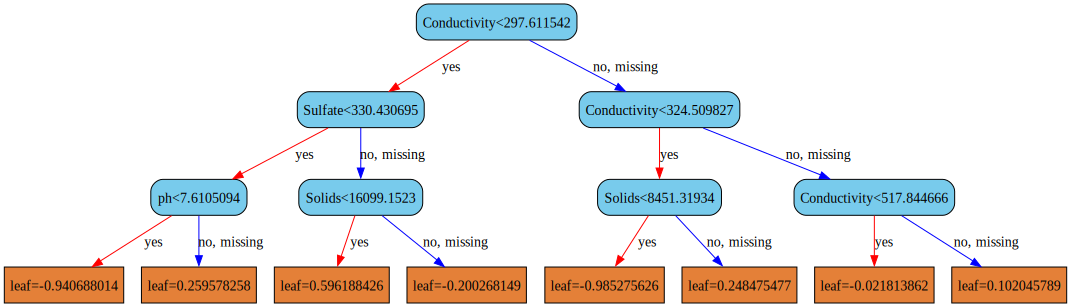

In [81]:
xgb.to_graphviz(final_mod,num_trees=9,size="5,5",   # Tree = 10 
               condition_node_params=parent_node,
               leaf_node_params=child_node)

### Accuracy of Train

In [82]:
train=pd.concat([X_train,y_train],axis=1)
train['Predicted']=final_mod.predict(X_train)  # MODEL = Final_mod
train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Predicted
3081,10.258615,141.488391,23989.990151,7.962066,389.392897,361.632055,14.908725,57.164556,3.590841,0,0
3072,7.036752,205.233634,21829.273148,6.677057,331.674650,338.567758,15.566655,56.608679,2.545631,0,0
1017,8.551078,216.415932,28909.290284,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380,0,0
295,6.139494,236.674026,8081.466471,6.250808,333.073546,416.238821,12.777014,106.037222,3.260907,1,1
2400,3.889107,117.125160,14904.940387,7.729645,400.322434,382.224370,15.872221,66.622485,4.473976,1,1


In [83]:
print('Classification report for train data is : \n',
      classification_report(y_train, train['Predicted']))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.70      0.92      0.80      1391
           1       0.76      0.40      0.52       902

    accuracy                           0.71      2293
   macro avg       0.73      0.66      0.66      2293
weighted avg       0.72      0.71      0.69      2293



### Accuracy of Test

In [84]:
test=pd.concat([X_test,y_test],axis=1)
test['Predicted']=final_mod.predict(X_test)  # MODEL = Final_mod
test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Predicted
2710,5.654119,171.751551,16431.204897,7.283454,387.904632,419.097306,11.814852,86.308236,3.466264,1,1
1801,7.323545,184.136070,21044.202663,6.842947,327.261202,379.492453,8.335245,90.312062,4.898421,0,0
1218,6.280978,205.123123,25972.803751,8.417896,383.671459,456.543945,13.954710,32.799029,4.599432,1,0
155,6.906992,216.785291,19991.239149,7.302352,340.106028,356.459137,9.614106,61.122644,2.124759,0,0
434,6.143921,175.274076,29072.169654,11.096086,287.698157,469.983324,13.142493,83.279658,3.476213,0,0


In [85]:
print('Classification report for test data is : \n',
      classification_report(y_test, test['Predicted']))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.65      0.84      0.74       607
           1       0.53      0.28      0.36       376

    accuracy                           0.63       983
   macro avg       0.59      0.56      0.55       983
weighted avg       0.60      0.63      0.59       983

